In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms

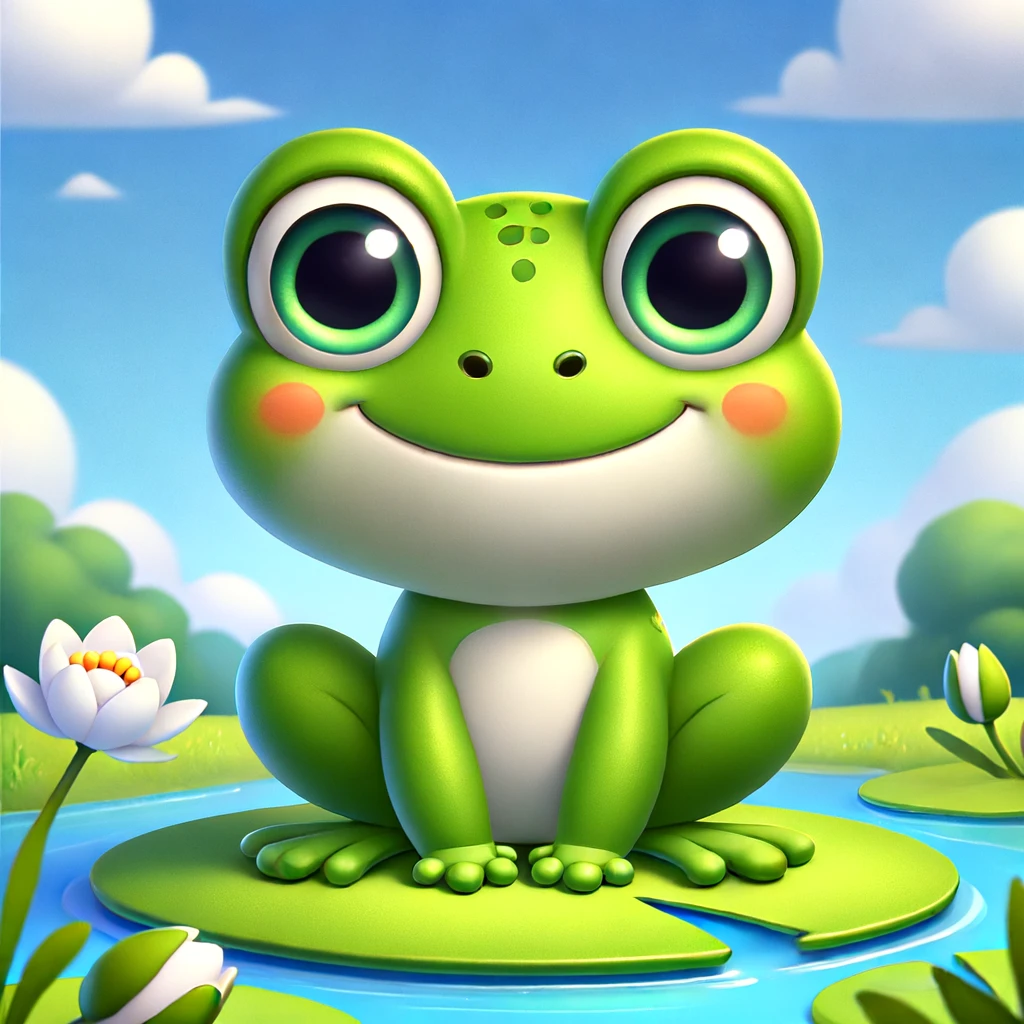

In [14]:
img = Image.open('frog.png').convert('RGB')
img

In [15]:
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
])

image_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가

In [16]:
# Apply Pixel Shuffle
upscale_factor = 2
pixel_shuffle = nn.PixelShuffle(upscale_factor)

# 채널을 늘리기 위해 임의의 채널 수를 증가시킴
input_channels = image_tensor.shape[1]
new_channels = input_channels * (upscale_factor ** 2)
image_tensor_shuffle = image_tensor.repeat(1, (new_channels // input_channels), 1, 1)
output_tensor_shuffle = pixel_shuffle(image_tensor_shuffle)

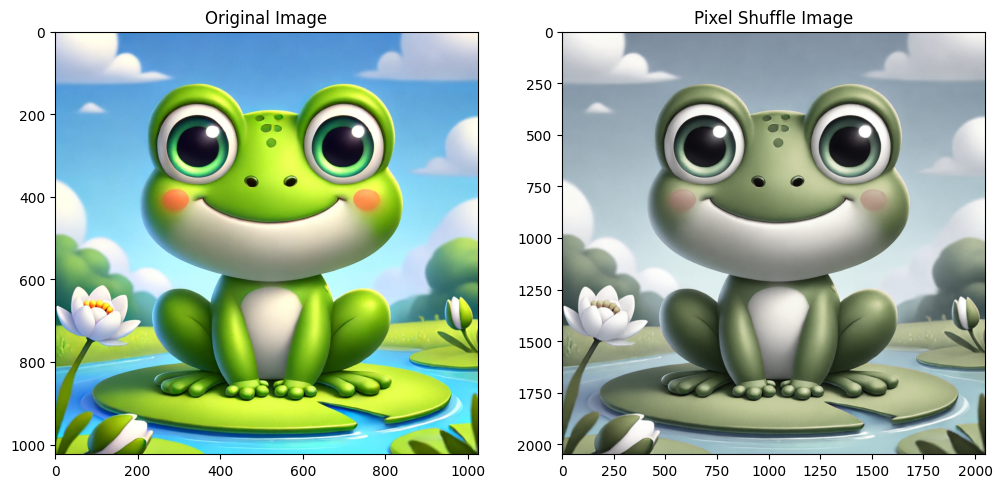

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image_tensor.squeeze().permute(1, 2, 0).numpy())
axs[0].set_title('Original Image')

axs[1].imshow(output_tensor_shuffle.squeeze().permute(1, 2, 0).detach().numpy())
axs[1].set_title('Pixel Shuffle Image')
plt.show()

In [18]:
# Apply Pixel Unshuffle
downscale_factor = upscale_factor
pixel_unshuffle = nn.PixelUnshuffle(downscale_factor)
output_tensor_unshuffle = pixel_unshuffle(output_tensor_shuffle)

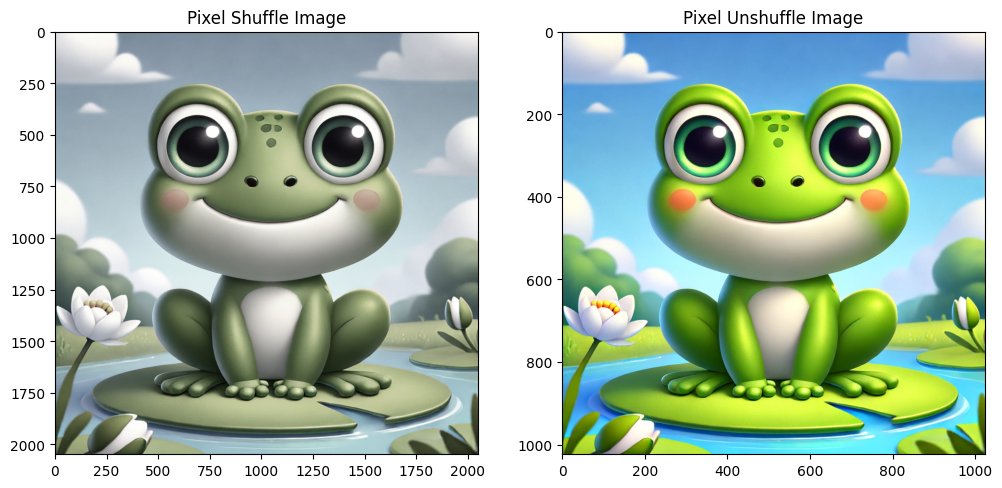

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(output_tensor_shuffle.squeeze().permute(1, 2, 0).detach().numpy())
axs[0].set_title('Pixel Shuffle Image')

# 다운샘플링 후 원래 채널 수로 복원
output_tensor_unshuffle = output_tensor_unshuffle[:, :3, :, :]  # 원래 RGB 채널 수(3)로 복원

axs[1].imshow(output_tensor_unshuffle.squeeze().permute(1, 2, 0).detach().numpy())
axs[1].set_title('Pixel Unshuffle Image')
plt.show()